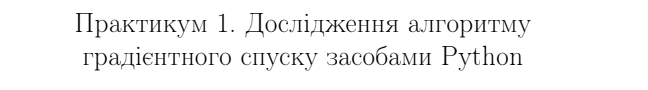
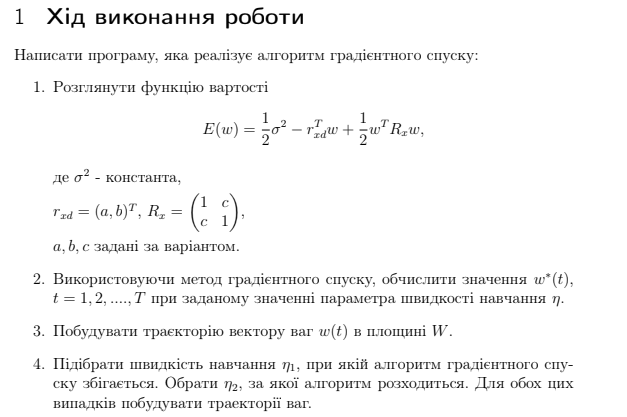
### Варіант 6


Градієнтний спуск — це поширений алгоритм оптимізації, який використовується в машинному навчанні для оцінки параметрів моделі. Згідно з обчисленням, це чиста часткова похідна і дає напрямок введення, в якому функція найшвидше зростає. По суті, щоб максимізувати функцію, алгоритм вибирає випадкову початкову точку, вимірює градієнт, робить невеликий крок у напрямку градієнта і повторює з новою початковою точкою. Аналогічно, функція мінімізується, роблячи невеликі кроки в протилежному напрямку. Ми обчислюємо функцію вартості на основі її початкових значень, а оцінки параметрів уточнюються на різних етапах, так що функція вартості в кінцевому підсумку має на увазі мінімальне значення.

Щоб зрозуміти, як працює градієнтний спуск, розглянемо функцію вартості з багатьма змінними $E(w)$ , де w = $[w_0 , w_1]^T$. Щоб знайти $w$ при якому ця функція досягає мінімуму, градієнтний спуск використовує такі кроки: 

- Виберемо початкове випадкове значення $w$ 
- Виберемо максимальну кількість ітерацій $T$
- Виберемо значення для швидкості навчання $η$ 
- Повторюємо наступні два кроки, доки $f$ не змінюється або ітерації перевищують $T$ </br>
a. Обчислюємо: $Δ w = − η ∇_w E ( w )$ </br>
б. оновлюємо $w$ як: $w := w + Δ w$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib notebook

a = 0.4 </br>
b = 0.8 </br>
c = 0.5 </br>
$r_{xd}=[a, b]^T$ </br>
$R_x = [[1, c],[c, 1]]$

$E(w)=\frac{1}{2} \sigma^2 - [a, b] * [[w_0], [w1]] + \frac{1}{2}[w_0, w_1]*[[1, c], [c, 1]]*[[w_0], [w_1]]$

Спростимо </br>
$r_{xd}^T w = aw_0+bw_1 = 0.4 w_0 + 0.8 w_1$ </br>
$w^T R_x w = [w_0, w_1]*[[1, c], [c, 1]]*[[w_0], [w_1]] = w_0^2 +2cw_0 w_1 + w_1^2$

Після чого маємо: </br>
$E(w)=\frac{1}{2} \sigma^2 -aw_0 - bw_1 + \frac{1}{2}(w_0^2 +2cw_0 w_1 + w_1^2)$

In [7]:
def cost_func(w0, w1):
    a, b, c = 0.4, 0.5, 0.7
    sigma = 1
    return 0.5*sigma**2 - a*w0 - b*w1 + 0.5*(w0**2 + 2*c*w0*w1 + w1**2)

In [11]:
def gradient_descent(gradient, start, learn_rate=0.3, 
                     iterations=500, threshold = 1e-3):
    
    w = start
    w_history = np.array([start])
    
    for i in range(iterations):
        diff = -learn_rate * gradient(w)
        print("gradient:", gradient(w))
        print("diff", diff)
        
        if np.all(np.abs(diff) <= threshold):
            break
            
        w += diff
        print("w", w)
        w_history = np.vstack([w_history, w])
        
    return w, w_history

In [4]:
def plot_gradient(x, y, w):    
    x, y = np.meshgrid(x, y)
    z = cost_func(x, y)
    
    plt.ion()
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, z, cmap='ocean', alpha=0.5)
    
    ax.set_xlabel('$w_0$')
    ax.set_ylabel('$w_1$')
    
    iterations = len(w_history) 
    print(f'Iterations: {iterations}')
    
    ax.scatter(w[0][0], w[0][1], cost_func(w[0][0], w[0][1]), c='red')
    
    for i in range(1, iterations):

        print(f"\r w0={w[i][0]}, w1={w[i][1]}", end="")
        
        ax.scatter(w[i][0], w[i][1], cost_func(w[i][0], w[i][1]), c='red')
        
        w0_value = [w[i][0], w[i-1][0]]
        w1_value = [w[i][1], w[i-1][1]]
        z_value = [cost_func(w[i][0], w[i][1]), cost_func(w[i-1][0], w[i-1][1])]
        ax.plot(w0_value, w1_value, z_value, 'r--', linewidth=0.8)
        fig.canvas.draw()
        time.sleep(0.1)
    
    
    plt.ioff()

In [12]:
x = np.arange(-1.5, 2, 0.2)
y = np.arange(-1.5, 2, 0.2)

w_start = [1, 1]
gradient = lambda w: np.array([w[0] + 0.7*w[1] - 0.4,
                               0.7*w[0] + w[1] - 0.5])

gradient: [1.3 1.2]
diff [-0.39 -0.36]
w [0.61 0.64]
gradient: [0.658 0.567]
diff [-0.1974 -0.1701]
w [0.4126 0.4699]


<IPython.core.display.Javascript object>


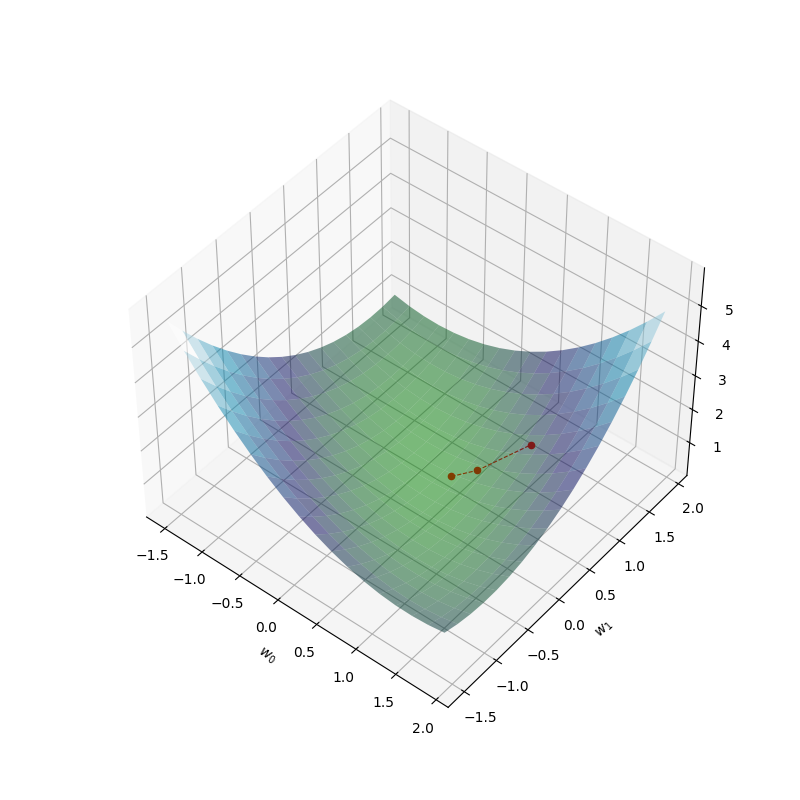

Iterations: 3
 w0=0.4126000000000001, w1=0.4699

In [13]:
w, w_history = gradient_descent(gradient, w_start, learn_rate=0.3, iterations=2)
plot_gradient(x, y, w_history)

<IPython.core.display.Javascript object>


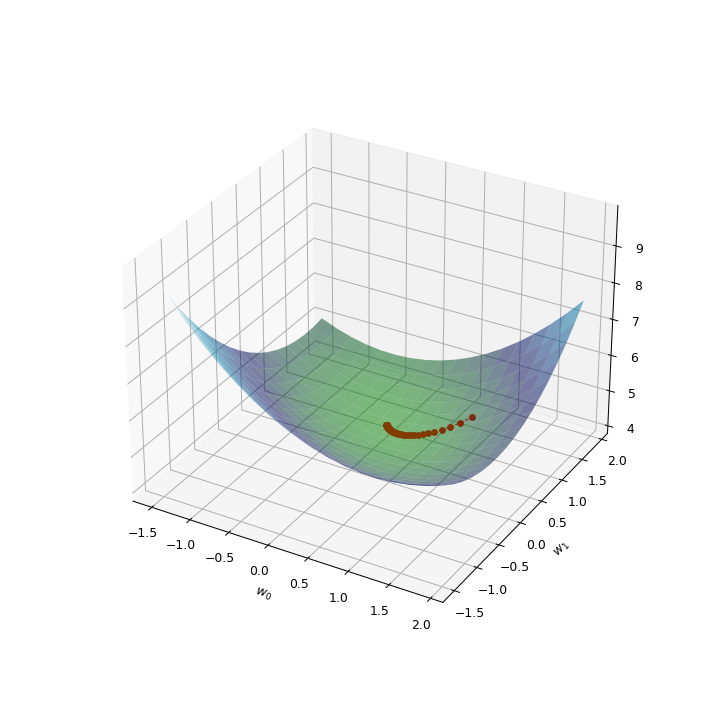

Iterations: 60
 w0=0.019438912564705847, w1=0.7806432923651674

In [18]:
w, w_history = gradient_descent(gradient, w_start, learn_rate=0.1)
plot_gradient(x, y, w_history)

<IPython.core.display.Javascript object>


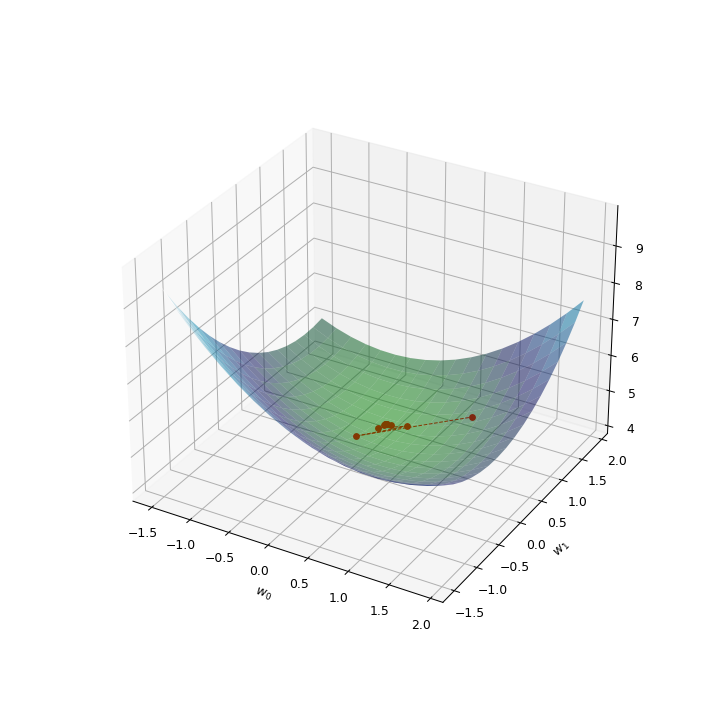

Iterations: 12
 w0=-9.76562500000222e-05, w1=0.7995117187500004

In [14]:
w, w_history = gradient_descent(gradient, w_start, learn_rate=1)
plot_gradient(x, y, w_history)

#### Висновок
Під час даної лабораторної роботи було реалізовано алгоритм градієнтного спуску. Під час дослідження, при швидкості навчання із значенням 0.5, було отримано значення вектору ваг $w = [0.003, 0.797]$, який є глобальний мінімумом. Також було досліджено, що зменшення коефіцієнту швидкості навчання призводить до збільшення кількості ітерацій, а при значенні, що є більшими за 1.4 відбувається розбіжність.